<a href="https://colab.research.google.com/github/PSuHyeon/Simple_TensorFlow/blob/main/Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import 명령어 (import_ipynb module 사용함)

In [30]:
!pip install import_ipynb
from google.colab import drive
drive.mount('/content/drive') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import import_ipynb
import numpy as np
# import drive.MyDrive.Colab_Notebooks.Simple_tf.Var_Fun as VF

In [32]:
# Colab 과 Google drive 환경에서 개발했기 때문에 추후에 import 주소 변경해야 할 수 있음. 
%run drive/MyDrive/Colab_Notebooks/Simple_tf/Var_Fun.ipynb

In [41]:
class Sin(Function):

  def forward(self, x):
    y = np.sin(x)
    return y
  
  def backward(self, gx):
    y = cos(self.inputs[0])
    return y * gx
  
def sin(x):
  return Sin()(x)

In [39]:
class Cos(Function):

  def forward(self, x):
    y = np.cos(x)
    return y

  def backward(self, gx):
    y = -sin(self.inputs[0])
    return y * gx

def cos(x):
  return Cos()(x) 

In [43]:
class Tanh(Function):

  def forward(self, x):
    y = np.tanh(x)
    return y

  def backward(self, gy):
    y = self.outputs[0]()
    gx = 1 - y ** 2
    return gy * gx 

def tanh(x):
  return Tanh()(x)

In [35]:
def rosenbrock(x0, x1):
  y = 100 * (x1 - x0 ** 2) ** 2 + (1 - x0) ** 2
  return y

Testing Sin graph with its first, second, third order differentiation

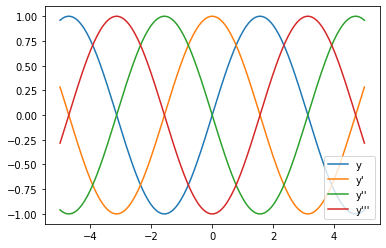

In [42]:
import matplotlib.pyplot as plt
x = Variable(np.linspace(-5, 5, 200)) 
y = sin(x)
y.backward(create_graph = True) 

logs = [y.data]

for i in range(3):
  logs.append(x.grad.data)
  gx = x.grad 
  x.cleargrad() 
  gx.backward(create_graph=True)
labels = ["y", "y'", "y''", "y'''"]
for i, v in enumerate(logs):
  plt.plot(x.data, logs[i], label = labels[i])
plt.legend(loc='lower right')
plt.show()

Testing efficiency for newton's method:

Newton's method works well since it automatically approximate learning rate using second order differentiation. However, calculating second order differentiation takes O(n^3), and therefore, it is not applicable for ordinary machine learning



In [44]:
x = Variable(np.array(2.0))
f = lambda x: x ** 4 - 2 * x ** 2
iter = 10 #only 10 iterations!

for i in range(iter):
  y = f(x)
  x.cleargrad()
  y.backward(create_graph=True)

  dx = x.grad
  x.cleargrad()
  dx.backward()
  ddx = x.grad

  x.data -= dx.data / ddx.data 

  print(x.data)


1.4545454545454546
1.1510467893775467
1.0253259289766978
1.0009084519430513
1.0000012353089454
1.000000000002289
1.0
1.0
1.0
1.0
